In [ ]:
# dataset 2: likely DID NOT include feature engineering beforehand
# dimensionality reduction techniques: PCA, TSNE, UMAP
# training & testing: LSVC, kNN, NB, RF, DT, SVM
# cross-validation: Leave-One-Out, Shuffle Split

In [1]:
# installing req packages and libraries

In [2]:
!pip install lmfit
!pip install umap-learn
!pip install tpot


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lmfit import Model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import umap
from tpot import TPOTClassifier
import warnings

warnings.filterwarnings('ignore')
sns.set_theme()
pl.rc('font',family='Arial')

In [4]:
# reading the data from csv files
# 2 files: data and labels

dataset = pd.read_csv("data.csv", header=0, index_col=0)
labels = pd.read_csv("labels.csv")
# number of cases of each cancer:
# breast: 38
# unknown: 7
# liver: 7
# bile duct: 5
# CRC: 44
# GBM: 38
# HD: 45
# control: 9
# lung: 59
# pancreas: 33

# P1: breast & CRC & GBM & HD & lung & pancreas
# liver & bile duct & control

In [5]:
# swaps rows and columns of data, ensuring genes are columns, sample no.s are rows
data = dataset.transpose(copy=False)

In [6]:
# removes first column of data - redundant
X = data.drop(data.columns[0],axis=1)
# contains target values: the Type of cancer
Y = labels.CancerType

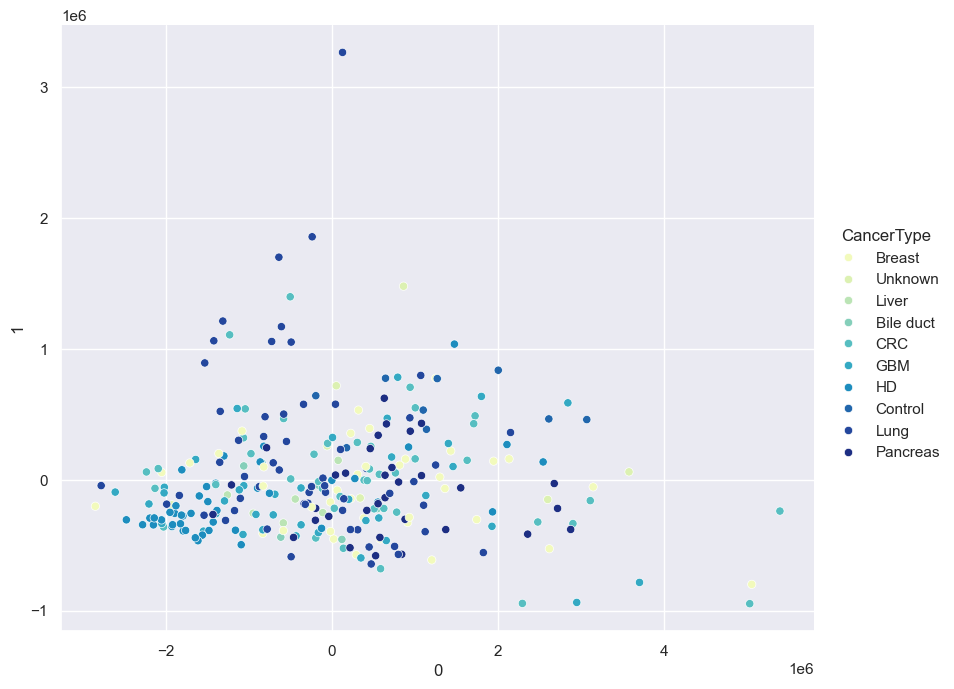

In [7]:
# plotting a graph using principle component analysis
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
featureNames = pca.get_feature_names_out(input_features=None)
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_pca, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

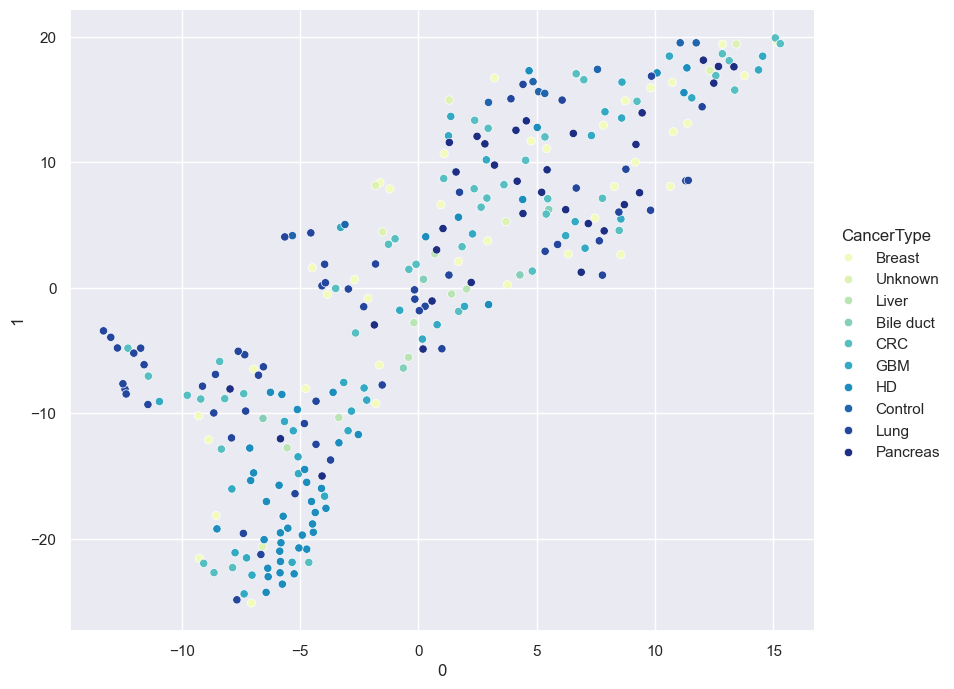

In [8]:
# plotting a graph using t-distributed Stochastic Neighbor Embedding
X_tsne = TSNE(n_components=2).fit_transform(X)
X_tsne = pd.DataFrame(data = X_tsne)
X_tsne = pd.concat([X_tsne.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_tsne, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

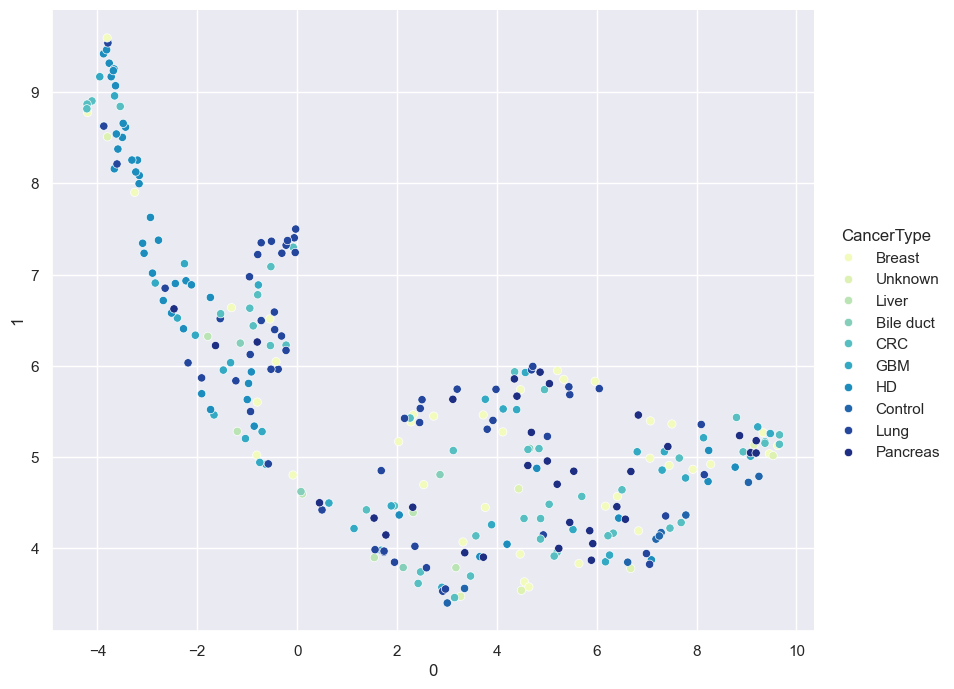

In [9]:
# plotting a graph using Uniform Manifold Approximation and Projection

X_umap = umap.UMAP().fit_transform(X)
X_umap = pd.DataFrame(data=X_umap)
X_umap = pd.concat([X_umap.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_umap, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

In [10]:
#Linear SVC

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

X_umap_clean = X_umap.dropna()

Y = X_umap_clean['CancerType']
X = X_umap_clean.drop(['CancerType'], axis=1)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.25, random_state=10)

lsvc_model = SVC(kernel='linear', random_state=10)
lsvc_model.fit(X_train, Y_train)

Y_pred = lsvc_model.predict(X_test)

print('train score: ' + str(lsvc_model.score(X_train, Y_train)))
print('test score:  ' + str(lsvc_model.score(X_test, Y_test)))


train score: 0.2676056338028169
test score:  0.3380281690140845


In [11]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

X_umap_clean = X_umap.dropna()

Y = X_umap_clean['CancerType']
X = X_umap_clean.drop(['CancerType'], axis=1)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.25, random_state=10)

rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train, Y_train)

Y_pred = rf_model.predict(X_test)

print('train score: ' + str(rf_model.score(X_train, Y_train)))
print('test score:  ' + str(rf_model.score(X_test, Y_test)))

train score: 1.0
test score:  0.28169014084507044


In [12]:
# k-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier

X_umap_clean = X_umap.dropna()

Y = X_umap_clean['CancerType']
X = X_umap_clean.drop(['CancerType'], axis=1)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.25, random_state=10)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

Y_pred = knn_model.predict(X_test)

print('train score: ' + str(knn_model.score(X_train, Y_train)))
print('test score:  ' + str(knn_model.score(X_test, Y_test)))

train score: 0.460093896713615
test score:  0.30985915492957744


In [13]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

X_umap_clean = X_umap.dropna()

Y = X_umap_clean['CancerType']
X = X_umap_clean.drop(['CancerType'], axis=1)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.25, random_state=10)

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

Y_pred = nb_model.predict(X_test)

print('train score: ' + str(nb_model.score(X_train, Y_train)))
print('test score:  ' + str(nb_model.score(X_test, Y_test)))

train score: 0.29577464788732394
test score:  0.30985915492957744


In [14]:
# Leave-One-Out ML Cross Validation, using DTs
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

clf = DecisionTreeClassifier(random_state=42)
loo = LeaveOneOut()

scores = cross_val_score(clf, X, Y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.]
Average CV Score:  0.25
Number of CV Scores used in Average:  284


In [15]:
# Shuffle Split Cross Validation, using DTs

from sklearn.model_selection import ShuffleSplit, cross_val_score

clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 150)

scores = cross_val_score(clf, X, Y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.23255814 0.1744186  0.31395349 0.25581395 0.20930233 0.1627907
 0.1627907  0.19767442 0.23255814 0.22093023 0.1627907  0.30232558
 0.31395349 0.23255814 0.25581395 0.18604651 0.22093023 0.23255814
 0.1627907  0.25581395 0.23255814 0.25581395 0.19767442 0.12790698
 0.20930233 0.26744186 0.26744186 0.20930233 0.19767442 0.24418605
 0.1744186  0.20930233 0.23255814 0.30232558 0.20930233 0.26744186
 0.27906977 0.27906977 0.19767442 0.25581395 0.19767442 0.25581395
 0.29069767 0.22093023 0.24418605 0.18604651 0.20930233 0.19767442
 0.25581395 0.24418605 0.1627907  0.24418605 0.19767442 0.20930233
 0.26744186 0.19767442 0.24418605 0.18604651 0.27906977 0.26744186
 0.30232558 0.22093023 0.23255814 0.24418605 0.1744186  0.22093023
 0.15116279 0.24418605 0.26744186 0.19767442 0.20930233 0.26744186
 0.27906977 0.24418605 0.24418605 0.23255814 0.19767442 0.23255814
 0.23255814 0.12790698 0.26744186 0.1627907  0.26744186 0.24418605
 0.31395349 0.23255814 0.24418605 0.1

In [16]:
# Leave-One-Out ML Cross Validation, using kNN

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Perform cross-validation and get scores
scores = cross_val_score(clf, X, Y, cv=loo)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Average CV Score:  0.2711267605633803
Number of CV Scores used in Average:  284


In [17]:
# Shuffle Split Cross Validation using kNN

clf = KNeighborsClassifier(n_neighbors=5)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits=150)

scores = cross_val_score(clf, X, Y, cv=ss)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.30232558 0.30232558 0.26744186 0.25581395 0.20930233 0.3372093
 0.31395349 0.22093023 0.20930233 0.22093023 0.25581395 0.23255814
 0.15116279 0.31395349 0.30232558 0.26744186 0.34883721 0.23255814
 0.24418605 0.26744186 0.25581395 0.22093023 0.26744186 0.22093023
 0.26744186 0.20930233 0.20930233 0.27906977 0.1744186  0.24418605
 0.24418605 0.26744186 0.24418605 0.23255814 0.30232558 0.22093023
 0.24418605 0.19767442 0.27906977 0.26744186 0.23255814 0.23255814
 0.30232558 0.29069767 0.27906977 0.23255814 0.20930233 0.27906977
 0.23255814 0.3372093  0.19767442 0.27906977 0.20930233 0.30232558
 0.24418605 0.25581395 0.23255814 0.23255814 0.1627907  0.25581395
 0.30232558 0.30232558 0.24418605 0.24418605 0.22093023 0.26744186
 0.22093023 0.29069767 0.26744186 0.22093023 0.24418605 0.22093023
 0.27906977 0.27906977 0.27906977 0.3372093  0.22093023 0.3372093
 0.18604651 0.22093023 0.29069767 0.27906977 0.30232558 0.24418605
 0.20930233 0.31395349 0.24418605 0.22

In [18]:
# Leave-One-Out ML Cross Validation, using Naive Bayes

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Perform cross-validation and get scores
scores = cross_val_score(clf, X, Y, cv=loo)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
Average CV Score:  0.2852112676056338
Number of CV Scores used in Average:  284


In [19]:
# Shuffle Split Cross Validation using NBs
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Initialize LeaveOneOut cross-validator
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits=150)

# Perform cross-validation and get scores
scores = cross_val_score(clf, X, Y, cv=ss)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.27906977 0.24418605 0.23255814 0.3255814  0.27906977 0.1744186
 0.29069767 0.31395349 0.27906977 0.26744186 0.27906977 0.3372093
 0.29069767 0.23255814 0.27906977 0.30232558 0.38372093 0.25581395
 0.26744186 0.23255814 0.23255814 0.30232558 0.31395349 0.29069767
 0.25581395 0.31395349 0.23255814 0.26744186 0.25581395 0.27906977
 0.3255814  0.24418605 0.3255814  0.27906977 0.26744186 0.23255814
 0.3372093  0.25581395 0.24418605 0.23255814 0.22093023 0.25581395
 0.3372093  0.30232558 0.29069767 0.31395349 0.3372093  0.34883721
 0.19767442 0.3372093  0.27906977 0.24418605 0.22093023 0.29069767
 0.27906977 0.3255814  0.31395349 0.24418605 0.22093023 0.25581395
 0.27906977 0.30232558 0.19767442 0.27906977 0.30232558 0.23255814
 0.24418605 0.3255814  0.20930233 0.30232558 0.23255814 0.31395349
 0.27906977 0.23255814 0.18604651 0.3255814  0.19767442 0.25581395
 0.31395349 0.26744186 0.22093023 0.3372093  0.30232558 0.25581395
 0.39534884 0.30232558 0.26744186 0.36

In [20]:
# Leave-One-Out ML Cross Validation, using SVMs
clf = SVC(kernel='linear', random_state=42)  # Change kernel as needed

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Perform cross-validation and get scores
scores = cross_val_score(clf, X, Y, cv=loo)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.]
Average CV Score:  0.25
Number of CV Scores used in Average:  284


In [21]:
# Shuffle Split Cross Validation using SVMs

clf = SVC(kernel='linear', random_state=42)  # Change kernel as needed

# Initialize LeaveOneOut cross-validator
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits=150)

# Perform cross-validation and get scores
scores = cross_val_score(clf, X, Y, cv=ss)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.25581395 0.24418605 0.3255814  0.27906977 0.29069767 0.25581395
 0.19767442 0.25581395 0.27906977 0.25581395 0.23255814 0.25581395
 0.26744186 0.19767442 0.31395349 0.29069767 0.22093023 0.18604651
 0.1627907  0.18604651 0.29069767 0.15116279 0.25581395 0.31395349
 0.27906977 0.19767442 0.30232558 0.27906977 0.26744186 0.25581395
 0.24418605 0.26744186 0.19767442 0.23255814 0.24418605 0.25581395
 0.31395349 0.26744186 0.29069767 0.34883721 0.24418605 0.18604651
 0.25581395 0.24418605 0.19767442 0.27906977 0.25581395 0.1744186
 0.25581395 0.3372093  0.41860465 0.3372093  0.30232558 0.27906977
 0.27906977 0.27906977 0.27906977 0.25581395 0.22093023 0.22093023
 0.23255814 0.27906977 0.26744186 0.25581395 0.30232558 0.30232558
 0.26744186 0.22093023 0.3255814  0.25581395 0.24418605 0.36046512
 0.18604651 0.25581395 0.20930233 0.27906977 0.25581395 0.1744186
 0.24418605 0.31395349 0.31395349 0.26744186 0.23255814 0.34883721
 0.3255814  0.3372093  0.22093023 0.19

In [22]:
# Shuffle Split Cross Validation using RFs

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits=150)

scores = cross_val_score(clf, X, Y, cv=ss)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.3372093  0.30232558 0.20930233 0.27906977 0.22093023 0.26744186
 0.3372093  0.26744186 0.20930233 0.30232558 0.29069767 0.26744186
 0.23255814 0.30232558 0.24418605 0.23255814 0.30232558 0.29069767
 0.1744186  0.30232558 0.24418605 0.18604651 0.26744186 0.20930233
 0.27906977 0.26744186 0.37209302 0.30232558 0.27906977 0.24418605
 0.27906977 0.26744186 0.34883721 0.25581395 0.22093023 0.27906977
 0.34883721 0.29069767 0.23255814 0.1744186  0.20930233 0.30232558
 0.19767442 0.23255814 0.27906977 0.3255814  0.23255814 0.20930233
 0.3372093  0.24418605 0.29069767 0.1744186  0.29069767 0.24418605
 0.3255814  0.30232558 0.29069767 0.24418605 0.36046512 0.23255814
 0.26744186 0.27906977 0.19767442 0.26744186 0.23255814 0.31395349
 0.19767442 0.25581395 0.30232558 0.22093023 0.27906977 0.22093023
 0.24418605 0.24418605 0.29069767 0.29069767 0.31395349 0.24418605
 0.3255814  0.26744186 0.26744186 0.20930233 0.24418605 0.25581395
 0.23255814 0.24418605 0.30232558 0.

In [25]:
# Leave-One-Out ML Cross Validation, using RFs

clf = RandomForestClassifier(random_state=42)

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Perform cross-validation and get scores
scores = cross_val_score(clf, X, Y, cv=loo)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.]
Average CV Score:  0.2992957746478873
Number of CV Scores used in Average:  284


In [ ]:
# plotting a graph using principle component analysis

filtered_labels = labels[labels['CancerType'].isin(['Breast', 'CRC', 'GBM', 'HD', 'Lung', 'Pancreas'])]

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
featureNames = pca.get_feature_names_out(input_features=None)
# Create a DataFrame with the principal components and corresponding cancer type
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

# Plot the pairplot with the selected cancer types and principal components
sns.pairplot(X_pca, hue="CancerType", palette="YlGnBu", height=7, aspect=1.2)
plt.show()

In [ ]:
# plotting a graph using principle component analysis

filtered_labels = labels[labels['CancerType'].isin(['Liver', 'Bile duct', 'Control'])]
# liver & bile duct & control

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
featureNames = pca.get_feature_names_out(input_features=None)
# Create a DataFrame with the principal components and corresponding cancer type
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

# Plot the pairplot with the selected cancer types and principal components
sns.pairplot(X_pca, hue="CancerType", palette="YlGnBu", height=7, aspect=1.2)
plt.show()

In [ ]:
# plotting a graph using t-distributed Stochastic Neighbor Embedding

filtered_labels = labels[labels['CancerType'].isin(['Breast', 'CRC', 'GBM', 'HD', 'Lung', 'Pancreas'])]
# breast & CRC & GBM & HD & lung & pancreas

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

# Apply TSNE, reducing data to 2 components
X_tsne = TSNE(n_components=2).fit_transform(X)
X_tsne = pd.DataFrame(data = X_tsne)
X_tsne = pd.concat([X_tsne.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_tsne, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

In [ ]:
# plotting a graph using t-distributed Stochastic Neighbor Embedding

filtered_labels = labels[labels['CancerType'].isin(['Liver', 'Bile duct', 'Control'])]
# liver & bile duct & control

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

# Apply TSNE, reducing data to 2 components
X_tsne = TSNE(n_components=2).fit_transform(X)
X_tsne = pd.DataFrame(data = X_tsne)
X_tsne = pd.concat([X_tsne.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_tsne, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

In [ ]:
# plotting a graph using Uniform Manifold Approximation and Projection

filtered_labels = labels[labels['CancerType'].isin(['Breast', 'CRC', 'GBM', 'HD', 'Lung', 'Pancreas'])]
# breast & CRC & GBM & HD & lung & pancreas

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

X_umap = umap.UMAP().fit_transform(X)
X_umap = pd.DataFrame(data=X_umap)
X_umap = pd.concat([X_umap.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_umap, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

In [ ]:
# plotting a graph using Uniform Manifold Approximation and Projection

filtered_labels = labels[labels['CancerType'].isin(['Liver', 'Bile duct', 'Control'])]
# liver & bile duct & control

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

X_umap = umap.UMAP().fit_transform(X)
X_umap = pd.DataFrame(data=X_umap)
X_umap = pd.concat([X_umap.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_umap, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

In [ ]:
# plotting a graph using principle component analysis

filtered_labels = labels[labels['CancerType'].isin(['Breast', 'CRC', 'HD', 'Lung', 'Pancreas'])]

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
featureNames = pca.get_feature_names_out(input_features=None)
# Create a DataFrame with the principal components and corresponding cancer type
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

# Plot the pairplot with the selected cancer types and principal components
sns.pairplot(X_pca, hue="CancerType", palette="YlGnBu", height=7, aspect=1.2)
plt.show()

In [ ]:
# plotting a graph using t-distributed Stochastic Neighbor Embedding

filtered_labels = labels[labels['CancerType'].isin(['Breast', 'CRC', 'HD', 'Lung', 'Pancreas'])]
# breast & CRC & GBM & HD & lung & pancreas

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

# Apply TSNE, reducing data to 2 components
X_tsne = TSNE(n_components=2).fit_transform(X)
X_tsne = pd.DataFrame(data = X_tsne)
X_tsne = pd.concat([X_tsne.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_tsne, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

In [ ]:
# plotting a graph using Uniform Manifold Approximation and Projection

filtered_labels = labels[labels['CancerType'].isin(['Breast', 'CRC', 'HD', 'Lung', 'Pancreas'])]
# breast & CRC & GBM & HD & lung & pancreas

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

X_umap = umap.UMAP().fit_transform(X)
X_umap = pd.DataFrame(data=X_umap)
X_umap = pd.concat([X_umap.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_umap, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

In [ ]:
# plotting a graph using principle component analysis

filtered_labels = labels[labels['CancerType'].isin(['Breast', 'CRC', 'Lung', 'Pancreas'])]

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
featureNames = pca.get_feature_names_out(input_features=None)
# Create a DataFrame with the principal components and corresponding cancer type
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

# Plot the pairplot with the selected cancer types and principal components
sns.pairplot(X_pca, hue="CancerType", palette="YlGnBu", height=7, aspect=1.2)
plt.show()

In [ ]:
# plotting a graph using t-distributed Stochastic Neighbor Embedding

filtered_labels = labels[labels['CancerType'].isin(['Breast', 'CRC', 'Lung', 'Pancreas'])]
# breast & CRC & GBM & HD & lung & pancreas

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

# Apply TSNE, reducing data to 2 components
X_tsne = TSNE(n_components=2).fit_transform(X)
X_tsne = pd.DataFrame(data = X_tsne)
X_tsne = pd.concat([X_tsne.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_tsne, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

In [ ]:
# plotting a graph using Uniform Manifold Approximation and Projection

filtered_labels = labels[labels['CancerType'].isin(['Breast', 'CRC', 'Lung', 'Pancreas'])]
# breast & CRC & GBM & HD & lung & pancreas

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

X_umap = umap.UMAP().fit_transform(X)
X_umap = pd.DataFrame(data=X_umap)
X_umap = pd.concat([X_umap.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_umap, hue="CancerType",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

In [ ]:
# plotting a graph using principle component analysis

filtered_labels = labels[labels['CancerType'].isin(['Breast', 'CRC', 'Lung'])]

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
featureNames = pca.get_feature_names_out(input_features=None)
# Create a DataFrame with the principal components and corresponding cancer type
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

# Plot the pairplot with the selected cancer types and principal components
sns.pairplot(X_pca, hue="CancerType", palette="YlGnBu", height=7, aspect=1.2)
plt.show()

In [ ]:
# plotting a graph using principle component analysis

filtered_labels = labels[labels['CancerType'].isin(['Breast', 'CRC', 'Pancreas'])]

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
featureNames = pca.get_feature_names_out(input_features=None)
# Create a DataFrame with the principal components and corresponding cancer type
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

# Plot the pairplot with the selected cancer types and principal components
sns.pairplot(X_pca, hue="CancerType", palette="YlGnBu", height=7, aspect=1.2)
plt.show()

In [ ]:
# plotting a graph using principle component analysis

filtered_labels = labels[labels['CancerType'].isin(['CRC', 'Pancreas', 'Lung'])]

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
featureNames = pca.get_feature_names_out(input_features=None)
# Create a DataFrame with the principal components and corresponding cancer type
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

# Plot the pairplot with the selected cancer types and principal components
sns.pairplot(X_pca, hue="CancerType", palette="YlGnBu", height=7, aspect=1.2)
plt.show()

In [ ]:
# plotting a graph using principle component analysis

filtered_labels = labels[labels['CancerType'].isin(['Breast', 'Pancreas', 'Lung'])]

# Drop the first column of data (redundant)
X = data.drop(data.columns[0], axis=1)
Y = filtered_labels

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
featureNames = pca.get_feature_names_out(input_features=None)
# Create a DataFrame with the principal components and corresponding cancer type
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

# Plot the pairplot with the selected cancer types and principal components
sns.pairplot(X_pca, hue="CancerType", palette="YlGnBu", height=7, aspect=1.2)
plt.show()